In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [37]:
# here we will prepare our enviornment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #this is for making graphs
import seaborn as sns
plt.style.use('ggplot')
#we need to import datetime to change 
import datetime as dt
#pd.set_option('max_column') 

In [38]:
#PREPARE phase
#here we will import only the files we need 
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [39]:
#next we will begin to explore the data
df.shape

(940, 15)

In [40]:
#now we will check our column names
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [41]:
#next lets preview the data 
#this will show the first 10 rows
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [42]:
# we will find the data types for each column
# we need to decide which data we will use for our analysis
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [43]:
# we see that Id is an int, we are not doing calculations with Id so we need to change it to a string
# also we need to change ActivityDate because it is an object
# CLEAN data phase
# first we will reformat Id and ActivityDate
# clean the data
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format = '%m/%d/%Y')
df.dtypes


Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [44]:
#here we notice total_distance is the same as tracker_distance
#Why are we repeating this column?
#Possibly it is the sum of the other columns
# A way for us to check this is to sum the other columns or subtract totalDistance and trackerDistance
# we create a new column and subtract totalDistance and trackerDistance
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

In [45]:
#now we will check if there are values other than 0
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [46]:
# we find most of the values are 0 but there are some non zero values
# now we will check if there are any values other than 0
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [47]:
#Now we can see totalDistance and trackerDistance are not the same
#If they were the same we would eliminate the column, could be an error from the person that created the data
#here we will change the column names to lower case and seperate them by an underscore because it is common practice
df.columns = df.columns.str.lower()
df.columns #shows lower case columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [48]:
#we will separate the words with underscores
df.rename(columns = {'activitydate':'activity_date', 'totalsteps':'total_steps', 'totaldistance':'total_distance', 'trackerdistance':'tracker_distance',
                     'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
                     'moderatelyactivedistance':'moderately_active_distance','lightactivedistance':'light_active_distance',
                     'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes', 
                     'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes', 
                     'sedentaryminutes':'sedentary_minutes', 'calories': 'calories'}, inplace = True) # use false to check first, 
                                                                              #change to true if u want a permenant change
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [49]:
#now we will use a function to add the day of the week in a column, create a column to hold the day of week number
#we need to go back and import the datetime function
#create columns
day_of_week = df['activity_date'].dt.day_name() #first create the variable
df['day_of_week'] = day_of_week #create of column
df['n_day_of_week'] = df['activity_date'].dt.weekday 
#we create the day of week number
#0 monday 6 sunday
df.day_of_week

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Sunday
936       Monday
937      Tuesday
938    Wednesday
939     Thursday
Name: day_of_week, Length: 940, dtype: object

In [50]:
#check the first four rows containing newly created columns
df.head(4)


,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4


In [51]:
#now we will check for empty or null values
#if we do not add .sum(), isna() will return all columns
df.isna().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [52]:
#we can also use the isnull() function which is the same
df.isnull().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [53]:
#now we will check for duplicates
df.duplicated().sum()

0

In [54]:
#next we will subset the data because we only want to use specific columns 
#since we do not know if the distance columns unit of measure(miles, feet, kilometers, etc) we will not use them
#we also have a total steps column that can be used to define a distance
#if we are working with the original data it is not recommended to delete any columns
#here we will scroll up and copy paste our columns,then edit as needed
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance', 'calories', 'day_of_week']].copy()
df.head(30)
#we can come back and edit this subset if we want to work with other columns


,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,calories,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,1863,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,1728,Sunday
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,1921,Monday
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,2035,Tuesday
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,1786,Wednesday
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,1775,Thursday


In [55]:
#ANALYSIS 
#now we are entering the analysis phase

# first check how many unique values we have for id
df['id'].unique()


# categories
# light active distance: 0.2 between 6.0 on average
# moderately active distance: between 6.0 and 8.0 on average
# very active distance: more than 8.0 on average

id_grp = df.groupby(['id']) #here we create the grouping
id_avg_distance = id_grp['total_distance'].mean().sort_values(ascending=False)


#next we will create a seperate data frame which groups info by id
id_avg_distance = id_avg_distance.to_frame()



#now we need to create a column to see where the data fits our categories

#we will create the conditons for our data

conditions = [
    (id_avg_distance < 6.0),
    (id_avg_distance >= 6.0) & (id_avg_distance <= 8.0),
    (id_avg_distance >= 8.0)
]

values = ['light activity', 'moderate activity', 'high activity']

# now we create the column
id_avg_distance['activity measure'] = np.select(conditions,values)

#now we will save the results in a variable
id_activity_measure = id_avg_distance['activity measure']

id_avg_distance

# now we want to create a colum for activity measure on our original data set so activity measure is added to id every time
# not just a copy and paste
# we need to use list comprehension

df['activity measure'] = [id_activity_measure[c] for c in df['id']]


In [56]:
# Anthony D'Amario uses the following analysis
# 2nd category
# minimal use: < 7600 steps on avg
# average use: between 7600 and 15000 steps on average
# maximum use: > 15000 steps on average




In [57]:
#here we want to check the number of id
df['id'].nunique()



33

In [58]:
#we also want to know how many times the ids appear on the dataset because we know the activity spans for a month
df['activity_date'].nunique()

31

In [59]:
#lets see if all 33 ids appear on all 31 days
df['id'].value_counts()
#we can see that for some days the id number appears less than all 31 days

id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [60]:
#now to analyze we can begin by describing our data
df.describe()
# this will show us some general stats
# here we can root out some outliers

,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,calories
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,2303.609574
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,1828.500000
50%,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,2134.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,2793.250000
max,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,4900.000000
std,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,718.166862


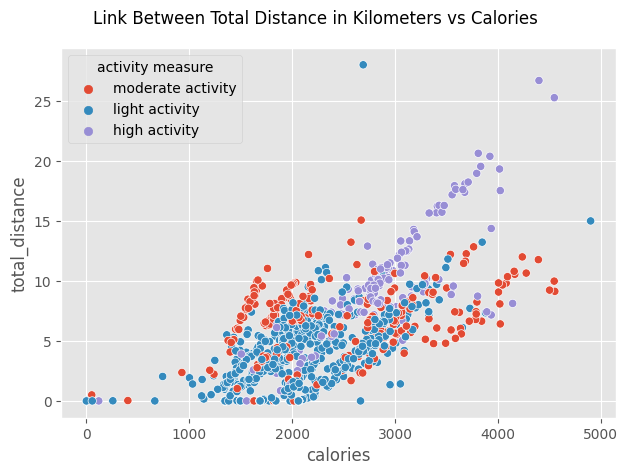

In [61]:
#SHARE
#now we want to make a correlation between activity measure and total distance
ax = sns.scatterplot(x = 'calories', y = 'total_distance', data=df, hue = df['activity measure'])


plt.suptitle("Link Between Total Distance in Kilometers vs Calories") 

plt.tight_layout()
plt.show()

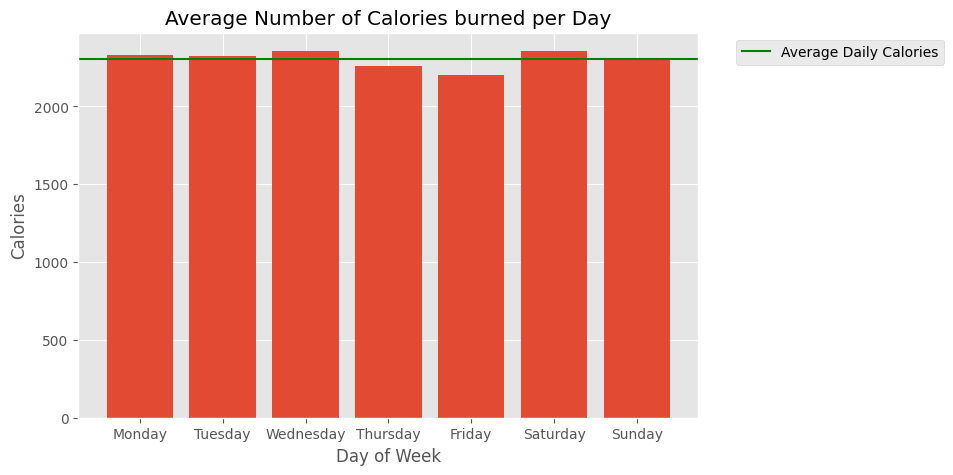

In [62]:
#we create a new variable with the days of the week
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# now we can look at the average distance traveled per day
fig, ax = plt.subplots(1, 1, figsize = (8,5))
#here we will create a new group
day_grp = df.groupby(['day_of_week'])
avg_daily_calories = day_grp['calories'].mean()
#now we create a variable to show us the mean of total distance
avg_calories = df['calories'].mean()
# we will use this as a comparison to each date
plt.bar(avg_daily_calories.index, avg_daily_calories)
#we notice our days of the week are in alphabetical order instead of chronological
#to fix it juan sets xticks
ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)
#here we will create a line that shows the average
ax.axhline(y = avg_calories.mean(), color = 'green', label = 'Average Daily Calories')
ax.set_ylabel('Calories')
ax.set_xlabel('Day of Week')
ax.set_title('Average Number of Calories burned per Day')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



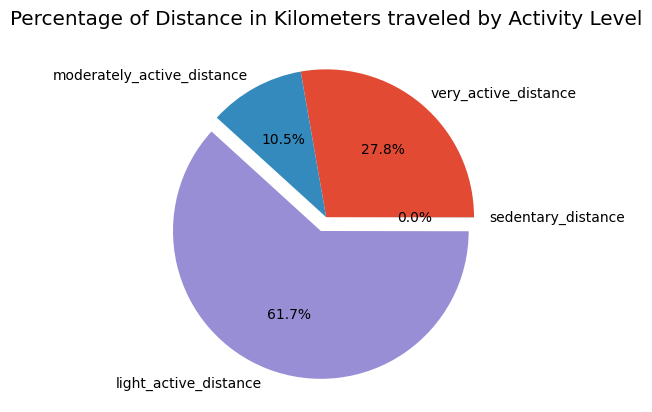

In [83]:
# now we can look at percentage of activity by distance
# we will use a pie chart
very_active_distance = df['very_active_distance'].sum()
moderately_active_distance = df['moderately_active_distance'].sum()
light_active_distance = df['light_active_distance'].sum()
sedentary_active_distance = df['sedentary_active_distance'].sum()

slices = [very_active_distance, moderately_active_distance, light_active_distance, sedentary_active_distance]

labels = ['very_active_distance', 'moderately_active_distance', 'light_active_distance', 'sedentary_distance']

#this will seperate the slices
explode = [0,0,0.1,0]

plt.pie(slices, labels=labels, explode = explode, autopct = '%1.1f%%')

plt.title('Percentage of Distance in Kilometers traveled by Activity Level')

plt.show()






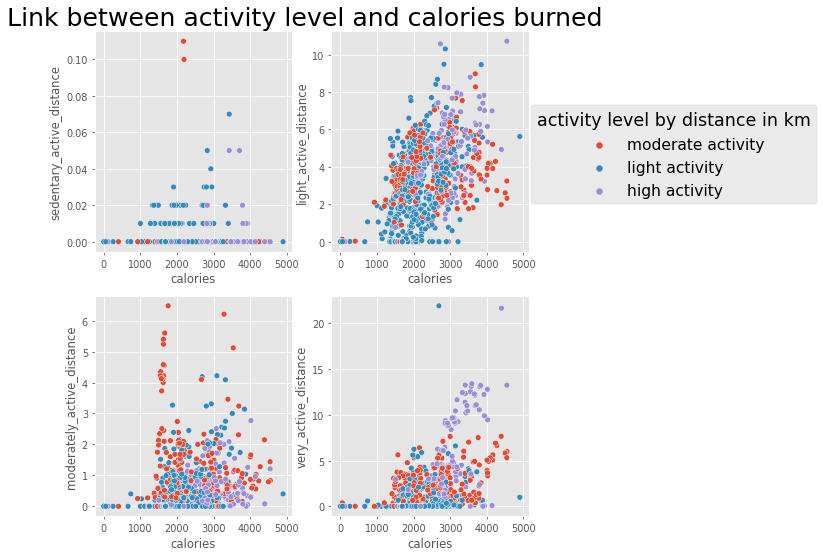

In [82]:

# we will create a list for day of the week

n_day_of_week = [0,1,2,3,4,5,6]

#we want multiple graphs in this block of code
#there will be four graphs

fig, axes = plt.subplots(nrows =2, ncols=2, figsize = (8,9), dpi=70)

sns.scatterplot(data = df, x = 'calories', y = 'sedentary_active_distance', hue = 'activity measure', ax=axes[0,0], legend=False)
sns.scatterplot(data = df, x = 'calories', y = 'light_active_distance', hue = 'activity measure', ax=axes[0,1], legend=False)
sns.scatterplot(data = df, x = 'calories', y = 'moderately_active_distance', hue = 'activity measure', ax=axes[1,0], legend=False)
sns.scatterplot(data = df, x = 'calories', y = 'very_active_distance', hue = 'activity measure', ax=axes[1,1], legend=True)


#we can use this code to move the legend outside of the graph
plt.legend(title = 'activity level by distance in km',fontsize=16, title_fontsize=18, bbox_to_anchor = (2.5, 1.9))

fig.suptitle('Link between activity level and calories burned', x=0.5, y=0.92, fontsize=26)

plt.show()